In [1]:
import nltk
#nltk.download() #check that everything is installed on the PC and uptodate

In [2]:
# pandas dataframes to hold the commentary
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline
pd.options.display.max_columns = None

# use nltk for the natural language processing
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# to read a directory on my PC
import glob

# to prepare the powerpoint presentation
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.enum.text import MSO_ANCHOR
from pptx.enum.dml import MSO_FILL
from pptx.dml.color import RGBColor

# # filter out all warnings 
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
# check on the panda version and its dependencies
# i run this from time to time to ensure all is up to date
pd.__version__
#pd.show_versions()

'0.25.3'

In [4]:
# Presentation preperation and image saving

# toggle to switch on image saving: 0 = off, 1 = on (i.e.save images and also slide titles)
savePNG = 0

# toggle to switch on powerpoint preparation: 0 = off, 1 = on (automatically saves the images also)
PwrptPrep = 1

# list of slide titles, text and images to add
monthNow = 'April 2020'
presentationTitle = ['Earnings Commentary sentiment analysis', 'Andrew Neville', monthNow]
saveFileName = 'Auto Trader - earningsSentiment.pptx'
slideTitle = []
slideText = []
imagePath = []

In [5]:
# list the files in the directory, will use the list of file names to create the Dataframes

files=[]
testLength = len("C:/Users/andrew/Documents/Big Data Project/Data Collectors/Twitter/ASOS/ASOSTwitteryyyymmdd")
files = glob.glob("C:/Users/andrew/Documents/Big Data Project/Data Collectors/Twitter/ASOS/*.csv")
if len(files) == 0:
    files = []
    files = glob.glob("C:/Users/andre/Documents/Big Data Project/Data Collectors/Twitter/ASOS/*.csv")
    testLength = len("C:/Users/andre/Documents/Big Data Project/Data Collectors/Twitter/ASOS/ASOSTwitteryyyymmdd")
if len(files) == 0:
    files = []
    #testLength = len("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/Twitter/ASOS/asostwitteryyyymmdd")
    files = glob.glob("C:/Users/andre/OneDrive/Documents/Python Programs/DVFA/AutoTradertranscript*.txt")

print("files to read ", str(len(files)))
print("first file ",files[0])
print("last file ", files[-1])

files to read  6
first file  C:/Users/andre/OneDrive/Documents/Python Programs/DVFA\AutoTradertranscript20170608.txt
last file  C:/Users/andre/OneDrive/Documents/Python Programs/DVFA\AutoTradertranscript20191107.txt


In [6]:
# create DataFrames
# this will create x number of Dataframes from the csv sheets in the files list, df[0] to df[n]
df = []

for i in range(len(files)):
    df.append(pd.read_csv(files[i], delimiter="\t", names=['text'], header=None))
             

In [7]:
df[-1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 1 columns):
text    213 non-null object
dtypes: object(1)
memory usage: 1.8+ KB


In [8]:
df[-1].head(10)

,text
0,Auto Trader Earnings S1 2020 Earnings Call Tel...
1,Event Date: 11/07/2019
2,Company Name: Auto Trader
3,Event Description:S1 2020 Earnings Call
4,Source: Auto Trader
5,Version: Final
6,"For more event information and transcripts,"
7,visit {AUTO LN Equity EVT BB-4902763-1 <GO>}
8,S1 2020 Earnings Call
9,Presentation


In [9]:
# for each line label it as either file data, prepared text or QandAs
# assume for now the prepared text starts at 'Presentation'
# assume for now the QandAs start at 'Questions And Answers'
# assume for now that the QandAs end at 'This transcript may not be 100 percent accurate and may contain misspellings and other inaccuracies.'

for ii in range(len(files)):
    
    data_type = []
    data_toggle = 'file data'

    for i in range(len(df[ii])):
        if df[ii]['text'][i].lower() == 'presentation' and data_toggle == 'file data':
            data_type.append('presentation')
            data_toggle = 'presentation'
        elif df[ii]['text'][i].lower() == 'management discussion section' and data_toggle == 'file data':
            data_type.append('presentation')
            data_toggle = 'presentation'
        elif df[ii]['text'][i].lower() == 'questions and answers' and data_toggle == 'presentation':
            data_type.append('QandAs')
            data_toggle = 'QandAs'
        elif '(question and answer)' in df[ii]['text'][i].lower() and data_toggle == 'presentation':
            data_type.append('QandAs')
            data_toggle = 'QandAs'  
        elif df[ii]['text'][i].lower() == 'q&a' and data_toggle == 'presentation':
            data_type.append('QandAs')
            data_toggle = 'QandAs'                  
        elif 'This transcript may not be 100 percent accurate and may contain misspellings and other inaccuracies' in df[ii]['text'][i] and data_toggle == 'QandAs':
            data_type.append('file data')
            data_toggle = 'file data'
        else:
            data_type.append(data_toggle)

    df[ii]['data_type'] = data_type

In [10]:
df[0].tail(20)

,text,data_type
57,"Outside the Trade segment, Consumer services r...",presentation
58,"However, with head counts investment, matching...",presentation
59,Operating margins will continue to improve. We...,presentation
60,Thank you for joining this morning and that no...,presentation
61,This transcript may not be 100 percent accurat...,presentation
62,Recommended Stories,presentation
63,BN 04/10 Japan Tech Bellwether Sees Worst Q...,presentation
64,"BN 04/10 In a Profit Black Hole, Canada Div...",presentation
65,DJ 04/10 Airlines Will Start Reporting Earn...,presentation
66,"BFW 04/10 Yaskawa Forgoes Full-Year Outlook,...",presentation


In [11]:
#
# adjust the text into lists of words
#

In [12]:
# step 1

for ii in range(len(files)):

    words_list = []

    for i in range(len(df[ii].index)):
        if df[ii]['data_type'][i] == 'file data':
            words_list.append('file data')
        else:
            text_toWordList = df[ii]['text'][i]
            words = word_tokenize(text_toWordList)
            wordsLower = [w.lower() for w in words]
            words_list.append(wordsLower)

    df[ii]['text_list'] = words_list # new dataframe column with the filtered text

In [13]:
with pd.option_context('display.max_colwidth', 300):
    print(df[-1]['text_list'][5:14])

5                                                                                                                                                                                                                                                                                                       file data
6                                                                                                                                                                                                                                                                                                       file data
7                                                                                                                                                                                                                                                                                                       file data
8                                                                                 

In [14]:
# step 2

stop_words = stopwords.words("english")
#stemmer = PorterStemmer()

In [15]:
for ii in range(len(files)):

    text_stopWords = []

    for i in range(len(df[ii].index)):
        
        if df[ii]['data_type'][i] == 'file data':
            text_stopWords.append('file data')
        else:                
            list_toFilter = df[ii]['text_list'][i]

            new_list = []
            for w in list_toFilter:
                if w not in stop_words:
                    new_list.append(w)
            text_stopWords.append(new_list)

    df[ii]['text_filtered'] = text_stopWords # new dataframe column with the filtered text

In [16]:
with pd.option_context('display.max_colwidth', 300):
    print(df[-1]['text_filtered'][5:14])

5                                                                                                                                                                                                                                                                                                       file data
6                                                                                                                                                                                                                                                                                                       file data
7                                                                                                                                                                                                                                                                                                       file data
8                                                                                 

In [17]:
#
# now open the LoughranMcDonald_MasterDictionary_2018 and create two lists
# one of the positive words, one of the negative words
#

In [18]:
file_loughran=[]
testLength = len("C:/Users/andrew/Documents/Big Data Project/Data Collectors/Twitter/ASOS/ASOSTwitteryyyymmdd")
file_loughran = glob.glob("C:/Users/andrew/Documents/Big Data Project/Data Collectors/Twitter/ASOS/*.csv")
if len(file_loughran) == 0:
    file_loughran = []
    file_loughran = glob.glob("C:/Users/andre/Documents/Big Data Project/Data Collectors/Twitter/ASOS/*.csv")
    testLength = len("C:/Users/andre/Documents/Big Data Project/Data Collectors/Twitter/ASOS/ASOSTwitteryyyymmdd")
if len(file_loughran) == 0:
    file_loughran = []
    #testLength = len("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/Twitter/ASOS/asostwitteryyyymmdd")
    file_loughran = glob.glob("C:/Users/andre/OneDrive/Documents/Python Programs/DVFA/LoughranMcDonald_MasterDictionary_2018.csv")

print("files to read ", str(len(file_loughran)))
print("first file ",file_loughran[0])
print("last file ", file_loughran[-1])

files to read  1
first file  C:/Users/andre/OneDrive/Documents/Python Programs/DVFA/LoughranMcDonald_MasterDictionary_2018.csv
last file  C:/Users/andre/OneDrive/Documents/Python Programs/DVFA/LoughranMcDonald_MasterDictionary_2018.csv


In [19]:
df_loughran = pd.read_csv(file_loughran[0])

In [20]:
df_loughran.head()

,Word,Sequence Number,Word Count,Word Proportion,Average Proportion,Std Dev,Doc Count,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Modal,Irr_Verb,Harvard_IV,Syllables,Source
0,AARDVARK,1,277,1.480000e-08,1.240000e-08,3.560000e-06,84,0,0,0,0,0,0,0,0,0,0,2,12of12inf
1,AARDVARKS,2,3,1.600000e-10,9.730000e-12,9.860000e-09,1,0,0,0,0,0,0,0,0,0,0,2,12of12inf
2,ABACI,3,8,4.280000e-10,1.390000e-10,6.230000e-08,7,0,0,0,0,0,0,0,0,0,0,3,12of12inf
3,ABACK,4,12,6.410000e-10,3.160000e-10,9.380000e-08,12,0,0,0,0,0,0,0,0,0,0,2,12of12inf
4,ABACUS,5,7250,3.870000e-07,3.680000e-07,3.370000e-05,914,0,0,0,0,0,0,0,0,0,0,3,12of12inf


In [21]:
# build the lists for the positive words and negative words

positive_words = []
negative_words = []

for i in range(len(df_loughran.index)):
    if df_loughran['Positive'][i] > 0:
        positive_words.append(df_loughran['Word'][i])
    elif df_loughran['Negative'][i] > 0:
        negative_words.append(df_loughran['Word'][i])
 

In [22]:
len(positive_words), len(negative_words)

(354, 2355)

In [23]:
#
# for each line in each transcript dataframe have a cell showing the number of positive and negative words
#

In [24]:
for iii in range(len(files)):
    
    positive_wordCount = []
    negative_wordCount = []
    
    for i in range(len(df[iii].index)):
        
        positive_count = 0
        for ii in range(len(positive_words)):
            positive_count = positive_count + df[iii]['text_filtered'][i].count(positive_words[ii].lower())
        positive_wordCount.append(positive_count)
    
        negative_count = 0
        for ii in range(len(negative_words)):
            negative_count = negative_count + df[iii]['text_filtered'][i].count(negative_words[ii].lower())
        negative_wordCount.append(negative_count)

    df[iii]['positive_wordCount'] = positive_wordCount
    df[iii]['negative_wordCount'] = negative_wordCount

In [25]:
df[0].head(20)

,text,data_type,text_list,text_filtered,positive_wordCount,negative_wordCount
0,Auto Trader Earnings Q4 2017 Earnings Call Tel...,file data,file data,file data,0,0
1,Event Date: 06/08/2017,file data,file data,file data,0,0
2,Company Name: Auto Trader,file data,file data,file data,0,0
3,Event Description:Q4 2017 Earnings Call,file data,file data,file data,0,0
4,Source: Auto Trader,file data,file data,file data,0,0
5,Version: Final,file data,file data,file data,0,0
6,"For more event information and transcripts,",file data,file data,file data,0,0
7,visit EVTS,file data,file data,file data,0,0
8,Q4 2017 Earnings Call,file data,file data,file data,0,0
9,MANAGEMENT DISCUSSION SECTION,presentation,"[management, discussion, section]","[management, discussion, section]",0,0


In [26]:
# set up new lists to summarise the dataframes
total_positive = []
total_negative = []
presentation_positive = []
presentation_negative = []
qandas_positive = []
qandas_negative = []

for i in range(len(files)):
    total_positive.append(df[i]['positive_wordCount'].sum())
    total_negative.append(df[i]['negative_wordCount'].sum())
    presentation_positive.append(df[i][df[i]['data_type'] == 'presentation']['positive_wordCount'].sum())
    presentation_negative.append(df[i][df[i]['data_type'] == 'presentation']['negative_wordCount'].sum())
    qandas_positive.append(df[i][df[i]['data_type'] == 'QandAs']['positive_wordCount'].sum())
    qandas_negative.append(df[i][df[i]['data_type'] == 'QandAs']['negative_wordCount'].sum())

df_chart = pd.DataFrame({"total_positive":total_positive})
df_chart['total_negative'] = total_negative
df_chart['presentation_positive'] = presentation_positive
df_chart['presentation_negative'] = presentation_negative
df_chart['qandas_positive'] = qandas_positive
df_chart['qandas_negative'] = qandas_negative
df_chart['check column'] = df_chart['total_positive'] + df_chart['total_negative'] \
- df_chart['presentation_positive'] - df_chart['presentation_negative'] \
- df_chart['qandas_positive'] - df_chart['qandas_negative']

In [27]:
df_chart['total_positive_%'] = df_chart['total_positive'] / (df_chart['total_positive'] + df_chart['total_negative'])
df_chart['presentation_positive_%'] = df_chart['presentation_positive'] / (df_chart['presentation_positive'] + df_chart['presentation_negative'])
df_chart['qandas_positive_%'] = df_chart['qandas_positive'] / (df_chart['qandas_positive'] + df_chart['qandas_negative'])

In [28]:
df_chart['qandas_positive_%'].fillna(0.50, inplace=True)

In [29]:
df_chart

,total_positive,total_negative,presentation_positive,presentation_negative,qandas_positive,qandas_negative,check column,total_positive_%,presentation_positive_%,qandas_positive_%
0,93,40,93,40,0,0,0,0.699248,0.699248,0.500000
1,66,31,65,29,1,2,0,0.680412,0.691489,0.333333
2,138,93,77,33,61,60,0,0.597403,0.700000,0.504132
3,113,72,66,26,47,46,0,0.610811,0.717391,0.505376
4,142,50,101,27,41,23,0,0.739583,0.789062,0.640625
5,166,77,82,24,84,53,0,0.683128,0.773585,0.613139


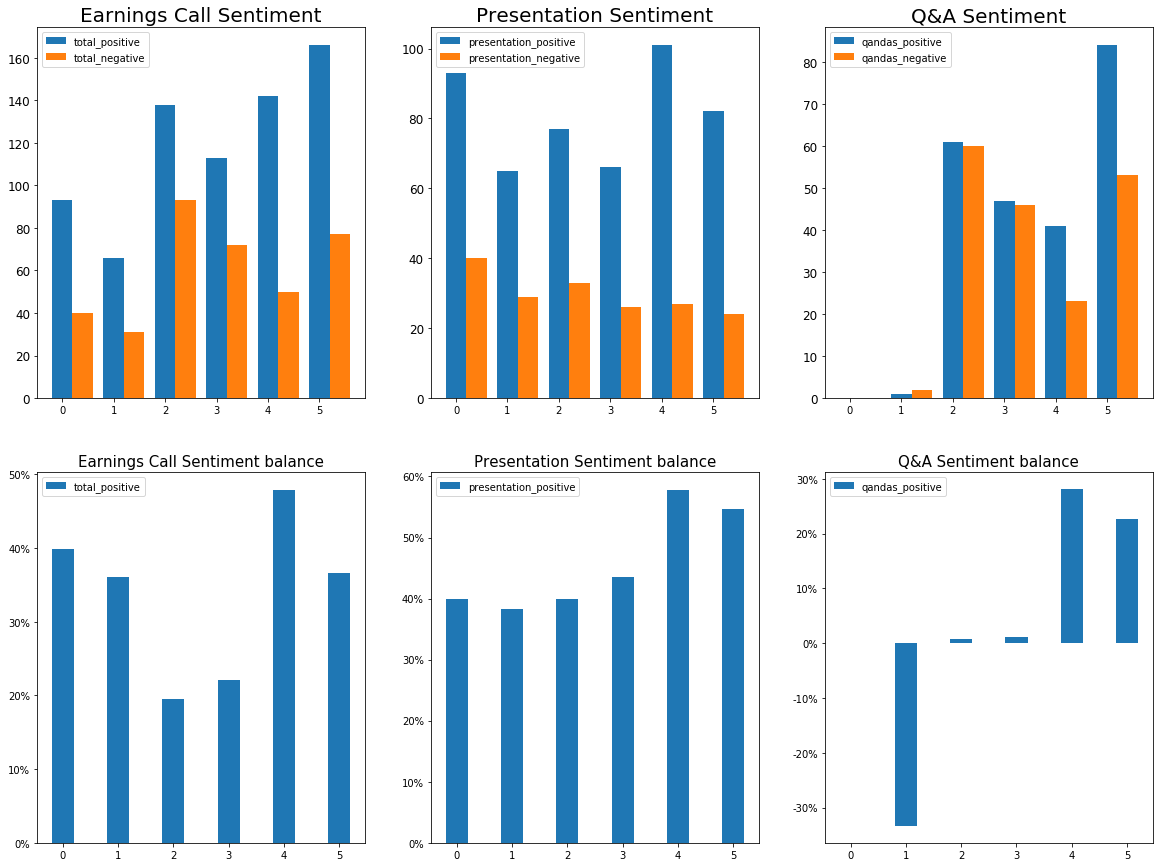

In [30]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,15))

plt.subplots_adjust(hspace=0.2, wspace=0.2)

y = list(df_chart.columns.values)
chart_title = ['Earnings Call Sentiment', 'Presentation Sentiment', 'Q&A Sentiment']

x = df_chart.index.astype(str)

labels = list(df_chart.index.values)

for i in range(3):
    ax[0,i].set_title((chart_title[i]), fontsize=20)
    ax[0,i].set_xticklabels(labels, rotation = 0, fontsize=10)
    ax[0,i].yaxis.set_tick_params(labelsize=12)
    ax[0,i].bar(x, df_chart[y[i*2]], width=0.4, label=y[i*2])
    ax[0,i].bar(x.astype(int) + 0.4, df_chart[y[i*2 +1]], width=0.4, label=y[i*2 +1])
    # if number_format == 'percent': # numbers are default y-axis
    #     ax[i].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[0,i].legend()

for i in range(3):
    ax[1,i].set_title((chart_title[i] + str(' balance')), fontsize=15)
    ax[1,i].set_xticklabels(labels, rotation = 0, fontsize=10)
    ax[1,i].yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax[1,i].bar(x, 2*df_chart[y[i+7]] - 1, width=0.4, label=y[i*2])
    ax[1,i].legend()
   
    
if savePNG == 1 or PwrptPrep == 1:
    file_path = 'Earnings Call - Auto Trader - charts.png'
    title = 'Charts of the Sentiment data: total call; management presentation; Q&A'
    
    plt.savefig(file_path, bbox_inches = 'tight')

    slideTitle.append(title)
    slideText.append('Start date to end date')
    imagePath.append(file_path)

plt.show()


In [31]:
#
# Preparing the presentation
#

In [32]:
if PwrptPrep == 1:
    try:
        prs = Presentation('Presentation - template.pptx')
    except:
        prs = Presentation('C:/Users/andre/OneDrive/Documents/Big Data Project/Jupyter Notebook Items/Presentation - template.pptx')

In [33]:
# change the title and date on the front page
# the slide shapes do not go nicely 0,1,2 they go 1,2,0
if PwrptPrep == 1:
    
    listShapes = [1,2,0]

    for i in range(3):
        slide = prs.slides[0]
        shape = slide.shapes[listShapes[i]]
        text_frame = shape.text_frame
        text_frame.paragraphs[0].runs[0].text = presentationTitle[i]

In [34]:
# add the Preamble and Summary slides
if PwrptPrep == 1:

    title_Preamble_Summary = ['Preamble', 'Summary']

    for i in range(2):
        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = title_Preamble_Summary[i]

        top = height = Inches(1.5)
        width = Inches(10.25)
        left = Inches(0.25)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame
        tf.word_wrap = True
        p = tf.add_paragraph()
        p.level = 1
        if i == 0:
            p.text = str(len(df)) + ' earnigns calls were reviewed for their sentiment'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'the focus was on the Question & Answer section, not the prepared management narrative'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'the Question & Answer session i would expect to give a better sentiment view given it is unprepared by management'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'given earnings statements include neutral financial words that carry sentiment in normal life (i.e.the word liability), i used the Loughran McDonald master dictionary'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'the prediction turned out the to be a simple (and disappointing) case of counting the positive and negative words present in the Question & Answer session that are present in the Master Dictionary'
            p = tf.add_paragraph()
            p.level = 1

        if i == 1:
            p.text = 'to be added by user if required'
            p = tf.add_paragraph()
            p.level = 1  

In [35]:
# add the Chapter contents slide and Chapter 1 slide
if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[15]
    slide = prs.slides.add_slide(blank_slide_layout)

    shapes = slide.shapes

    shapes.title.text = 'Contents'

    rows = cols = 2
    left = Inches(0.25)
    top = Inches(1.5)
    width = Inches(1.5)
    height = Inches(1.5)

    table = shapes.add_table(rows, cols, left, top, width, height).table

    # set column widths
    table.columns[0].width = Inches(1.5)
    table.columns[1].width = Inches(2.0)

    tableText = ['01', 'Charts', '02', 'Appendix']
    TableFont = [60, 14, 60, 14]
    tableCell1 = [0,0,1,1]
    tableCell2 = [0,1,0,1]

    for i in range(4):
        table.cell(tableCell1[i], tableCell2[i]).text = tableText[i]
        cell = table.cell(tableCell1[i], tableCell2[i])
        para = cell.text_frame.paragraphs[0]
        para.font.bold = True
        para.font.size = Pt(TableFont[i])
        para.font.color.rgb = RGBColor(0, 55, 129) 
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE
        fill = cell.fill
        fill.background()

    slide = prs.slides.add_slide(prs.slide_layouts[9])
    placeholder = slide.placeholders[1]
    placeholder.text = '01'
    title = slide.shapes.title
    title.text = 'Charts'


In [36]:
# add a blank slide with title, text and saved graphic as per the list of items
if PwrptPrep == 1:
    
    for i in range(len(slideTitle)):

        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = slideTitle[i]

        top = width = height = Inches(1.5)
        left = Inches(0.25)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame

        p = tf.add_paragraph()
        p.text = slideText[i]
        p.font.bold = True
        p.font.size = Pt(14)

        left = Inches(0.25)
        top = Inches(2.5)
        height = Inches(4)
        width = Inches(9)
        pic = slide.shapes.add_picture(imagePath[i], left, top, width = width, height = height)

In [37]:
# add Appendix slide

if PwrptPrep == 1:
    
    slide = prs.slides.add_slide(prs.slide_layouts[9])
    placeholder = slide.placeholders[1]
    placeholder.text = '02'
    title = slide.shapes.title
    title.text = 'Appendix'

In [38]:
# add the 'First 5 lines of the latest upload slide'

if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[15]
    slide = prs.slides.add_slide(blank_slide_layout)

    shapes = slide.shapes

    shapes.title.text = 'First 5 lines of the last uploaded earnings call file'

    rows = 6
    cols = 2
    left = Inches(0.25)
    top = Inches(1.5)
    width = Inches(1.5)
    height = Inches(0.25)

    table = shapes.add_table(rows, cols, left, top, width, height).table

    # set column widths
    table.columns[0].width = Inches(0.5)
    table.columns[1].width = Inches(8.0)
    
    tableText = ['']
    
    # table headers
    for col in df[-1].columns[0:cols-1]:
        tableText.append(col)
    
    # populate rest of list with dataframe cells
    for i in range((rows-1) * (cols-1)):
        if i%(cols-1) == 0:
            tableText.append(str(int(i/(cols-1))))          
        tableText.append(str(df[-1].iat[int(i/(cols-1)), i%(cols-1)]))

    for i in range((rows) * cols):
        table.cell(int(i/(cols)), i%cols).text = tableText[i]
        cell = table.cell(int(i/(cols)), i%cols)
        para = cell.text_frame.paragraphs[0]
        if i%cols == 0 or int(i/cols) == 0:
            para.font.bold = True
        else:
            para.font.bold = False
        para.font.size = Pt(10)
        para.font.color.rgb = RGBColor(0, 0, 0) 
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE
        fill = cell.fill
        fill.background()
    

In [39]:
# add the methodology slide
# and the 'Code used to gather page', rotate the text
# and upload the Python, github and Pandas pages

if PwrptPrep == 1:
    
    # list of appendix text files to take from my PC to be put into slides
    appendixTitleList = ['Appendix: Python Programming Language','Appendix: Github','Appendix: Pandas']
    appendixFileList = ['Presentation - Python Slide.txt','Presentation - Github Slide.txt','Presentation - Pandas Slide.txt']
    appendixFileList_alt = []
    for element in appendixFileList:
        appendixFileList_alt.append('C:/Users/andre/OneDrive/Documents/Big Data Project/Jupyter Notebook Items/' + element)
    
    for i in range(len(appendixTitleList)):
        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)
        title = slide.shapes.title
        title.text = appendixTitleList[i]
        try:
            lines = [line.rstrip('\n') for line in open(appendixFileList[i])]
        except:
            lines = [line.rstrip('\n') for line in open(appendixFileList_alt[i])]
        
        if (appendixTitleList[i] == 'Code used to gather the twitter data part 1') or \
        (appendixTitleList[i] == 'Code used to gather the twitter data part 2') or \
        (appendixTitleList[i] == 'Code used to gather the twitter data part 3') or \
        (appendixTitleList[i] == 'Code used to gather the twitter data part 4') or \
        (appendixTitleList[i] == 'Code used to gather the twitter data part 5') or \
        (appendixTitleList[i] == 'Code used to gather the twitter data part 6'): # rotate the text code -90
            top = height = Inches(1.25)
            width = Inches(10.25)
            left = Inches(-4.25)
            txBox = slide.shapes.add_textbox(left, top, width, height)
            txBox.rotation = -90            
        else: # other slides are normal
            top = height = Inches(1.25)
            width = Inches(10.25)
            left = Inches(0.25)
            txBox = slide.shapes.add_textbox(left, top, width, height)
            txBox.rotation = 0
            
        tf = txBox.text_frame
        tf.word_wrap = True
        
        for ii in range(len(lines)):
            p = tf.add_paragraph()
            p.level = 1
        
            if (appendixTitleList[i] == 'Code used to gather the twitter data part 1') or \
            (appendixTitleList[i] == 'Code used to gather the twitter data part 2') or \
            (appendixTitleList[i] == 'Code used to gather the twitter data part 3') or \
            (appendixTitleList[i] == 'Code used to gather the twitter data part 4') or \
            (appendixTitleList[i] == 'Code used to gather the twitter data part 5') or \
            (appendixTitleList[i] == 'Code used to gather the twitter data part 6'): # reduce the font size
                p.font.size = Pt(8)
                p.level = 0  
            else:
                txBox.rotation = 0
                p.font.size = Pt(12)            
            
            if 'https' in lines[ii]:
                r = p.add_run()
                r.text = lines[ii].split('https')[0]
                r1 = p.add_run()
                r1.text = 'https' + lines[ii].split('https')[1]        
                hlink = r1.hyperlink
                hlink.address = r1.text
            else:
                p.text = lines[ii]


In [40]:
# add closing slide

if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[40]
    slide = prs.slides.add_slide(blank_slide_layout)

In [41]:
# save completed presentation to file using name diven in the slide name cell
if PwrptPrep == 1:

    prs.save(saveFileName)

In [42]:
#
# all the slide types
# only to be run for reference
#

In [43]:
# prs = Presentation('Persentation - template.pptx')

In [44]:
# for i in range(43):

#     blank_slide_layout = prs.slide_layouts[i]
#     slide = prs.slides.add_slide(blank_slide_layout)

In [45]:
# prs.save('presentationPrep - all the slides.pptx')